# Importing libraries and datasets

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import ShuffleSplit

In [139]:
with open('/content/drive/MyDrive/Heart Disease Prediction/Datasets/df_combined.pickle', 'rb') as f:
    df = pickle.load(f)

# Splitting into training and testing sets

In [140]:
X, y = df.drop(columns=['num']).values, df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the K-NN classifier and making predictions

We determine the optimal number of neighbours (k) using GridSearchCV:

In [141]:
nb_of_neighbours = [int(x) for x in np.linspace(1, 100, num = 100)]
param_grid = {'n_neighbors': nb_of_neighbours}
classifier = KNeighborsClassifier()
cv = ShuffleSplit(n_splits = 3, test_size = 1/3, train_size = 2/3, random_state = 123)
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = cv)
grid_search.fit(X_train, y_train)
print("Optimal value of k is: " + str(grid_search.best_params_))

Optimal value of k is: {'n_neighbors': 33}


We train the classifier using the most optimal parameters: 

In [142]:
classifier = grid_search.best_estimator_
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [143]:
y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

# Results for training dataset

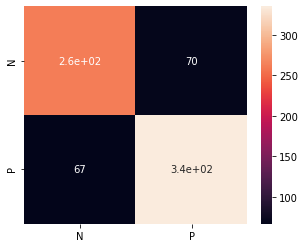

In [144]:
cm = confusion_matrix(y_train, y_pred_train)
df_cm = pd.DataFrame(cm, index=['N','P'], columns = ['N','P'])
plt.figure(figsize=(5,4))
plt.clf()
res = sns.heatmap(df_cm, annot=True)

In [145]:
accuracy_score(y_train, y_pred_train)

0.8133514986376021

In [146]:
recall_score(y_train, y_pred_train)

0.8333333333333334

In [147]:
tn, fp, fn, tp = cm.ravel()
tnr_train = 1 - fp / (tn + fp)
print(tnr_train)

0.7891566265060241


In [148]:
precision_score(y_train, y_pred_train)

0.8271604938271605

In [149]:
f1_score(y_train, y_pred_train)

0.8302354399008675

# Results for testing dataset

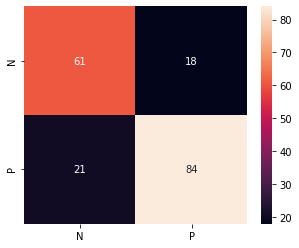

In [150]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['N','P'], columns = ['N','P'])
plt.figure(figsize=(5,4))
plt.clf()
res = sns.heatmap(df_cm, annot=True)

In [151]:
accuracy_score(y_test, y_pred)

0.7880434782608695

In [152]:
recall_score(y_test, y_pred)

0.8

In [153]:
tn, fp, fn, tp = cm.ravel()
tnr_test = 1 - fp / (tn + fp)
print(tnr_test)

0.7721518987341772


In [154]:
precision_score(y_test, y_pred)

0.8235294117647058

In [155]:
f1_score(y_test, y_pred)

0.8115942028985507

# Results Summary

In [156]:
results = {
     'Model': 'K-Nearest Neighbours',
     'Training Dataset Accuracy': accuracy_score(y_train, y_pred_train),
     'Testing Dataset Accuracy': accuracy_score(y_test, y_pred),
     'Training Dataset Sensitivity' : recall_score(y_train, y_pred_train),
     'Testing Dataset Sensitivity' : recall_score(y_test, y_pred),
     'Training Dataset Precision' : precision_score(y_train, y_pred_train),
     'Testing Dataset Precision' : precision_score(y_test, y_pred),
     'Training Dataset Specificity' : tnr_train,
     'Testing Dataset Specificity' : tnr_test,
     'Training Dataset F-Score' : f1_score(y_train, y_pred_train),
     'Testing Dataset F-Score' : f1_score(y_test, y_pred),
}

pd.DataFrame(results, index=[0])

,Model,Training Dataset Accuracy,Testing Dataset Accuracy,Training Dataset Sensitivity,Testing Dataset Sensitivity,Training Dataset Precision,Testing Dataset Precision,Training Dataset Specificity,Testing Dataset Specificity,Training Dataset F-Score,Testing Dataset F-Score
0,K-Nearest Neighbours,0.813351,0.788043,0.833333,0.8,0.82716,0.823529,0.789157,0.772152,0.830235,0.811594
